### Data: [Yahoo Finance](https://in.finance.yahoo.com/quote/SBIN.NS/history?period1=1394908200&period2=1458066600&interval=1d&filter=history&frequency=1d)
#### taking SBIN.NS Data from time period of 16-Mar-2014 to 16-Mar-2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [4]:
df.index.min(), df.index.max()

(Timestamp('2014-03-18 00:00:00'), Timestamp('2016-03-16 00:00:00'))

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-18,165.500000,170.899994,165.500000,170.130005,154.900299,29193580.0
2014-03-19,171.000000,171.949997,169.654999,170.884995,155.587708,17798490.0
2014-03-20,170.600006,170.600006,167.250000,167.794998,152.774323,14052620.0
2014-03-21,169.800003,171.179993,168.899994,170.214996,154.977692,16902930.0
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-10,184.750000,184.750000,179.399994,180.500000,176.563187,20472928.0
2016-03-11,180.000000,182.649994,177.550003,180.100006,176.171921,21869157.0
2016-03-14,182.449997,183.399994,180.699997,181.750000,177.785919,14369755.0
2016-03-15,181.649994,186.199997,181.649994,185.300003,181.258499,22369600.0
2016-03-16,185.000000,185.899994,181.600006,185.199997,181.160660,19237834.0


In [7]:
# get all rows with nulls
df[df.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# backfilling to replace values
df = df.fillna(method='bfill')

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02
mean,252.647835,255.808129,248.760275,252.003008,243.431080,1.771462e+07
std,39.477599,39.653269,38.958956,39.297453,38.918655,9.816939e+06
min,155.000000,157.649994,148.250000,151.800003,148.489151,0.000000e+00
25%,236.000000,240.287495,233.600006,236.542499,229.175514,1.222857e+07
50%,256.367508,260.100006,253.500000,256.470001,248.138176,1.570160e+07
75%,276.662491,279.985008,272.101250,275.674988,267.142258,2.086328e+07
max,332.799988,336.000000,328.200012,334.600006,323.221802,8.994794e+07


* during this time period, highest Adj Close price was 323.221802
* during this time period, lowest Adj Close price was 148.489151
* during this time period, average Adj Close price was 243.431080

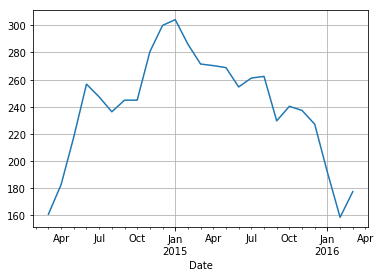

In [10]:
monthly_agg = df.copy()
monthly_agg.resample('M').mean()['Adj Close'].plot(grid=True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

* during Jan-2015 was the time when the price was at the rise

In [11]:
print ("===========================================================================================")
max_idx = df['Adj Close'].idxmax()
print (df.loc[[max_idx]])
print ("===========================================================================================")
min_idx = df['Adj Close'].idxmin()
print (df.loc[[min_idx]])
print ("===========================================================================================")

                  Open   High         Low       Close   Adj Close      Volume
Date                                                                         
2015-01-28  330.399994  336.0  328.200012  334.600006  323.221802  19428852.0
                  Open        High    Low       Close   Adj Close      Volume
Date                                                                         
2016-02-25  157.600006  158.100006  151.0  151.800003  148.489151  22713124.0


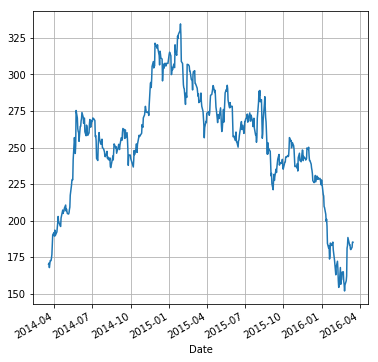

In [12]:
df['Close'].plot(grid=True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

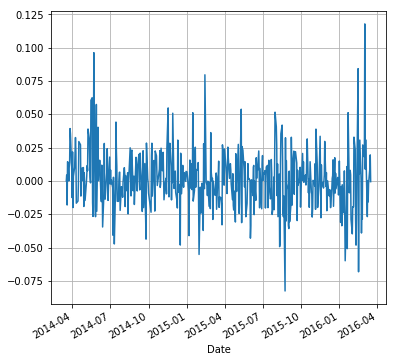

In [13]:
daily_close = df[['Adj Close']]
daily_pt_change = daily_close.pct_change()
daily_pt_change.fillna(0, inplace=True)
daily_pt_change['Adj Close'].plot(grid=True)
plt.rcParams["figure.figsize"] = (6, 9)
plt.show()

* daily percentage change gone below -0.075 some where around 2015 September, October

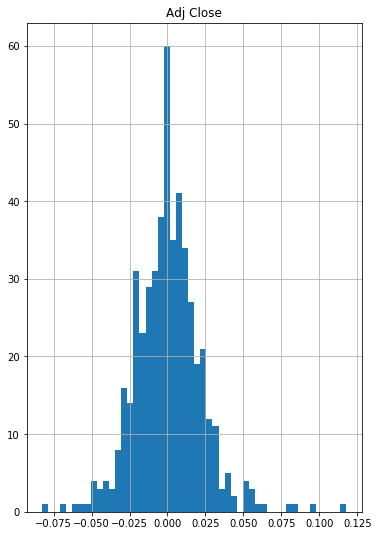

In [14]:
daily_pt_change.hist(bins=50);

* it seems to be evenly distirbuted with couple of outliers at -0.075, 0.100, 0.125

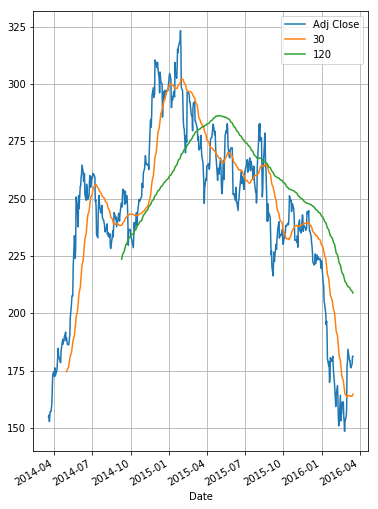

In [15]:
rolling_df = pd.DataFrame()
rolling_df['Adj Close'] = df['Adj Close']
rolling_df['30'] = df['Adj Close'].rolling(window=30).mean()
rolling_df['120'] = df['Adj Close'].rolling(window=120).mean()
rolling_df[['Adj Close', '30', '120']].plot(grid=True)
plt.rcParams["figure.figsize"] = (6, 12)
plt.show()

* TODO: Explore further techniques to explore and analyze stock data